
Underfitting vs. Overfitting
============================

In [4]:
import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [5]:
np.random.seed(0)

In [10]:
n_samples =30
degrees = [1,2,4,10,14,20]

In [11]:
true_fun = lambda X:np.cos(1.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

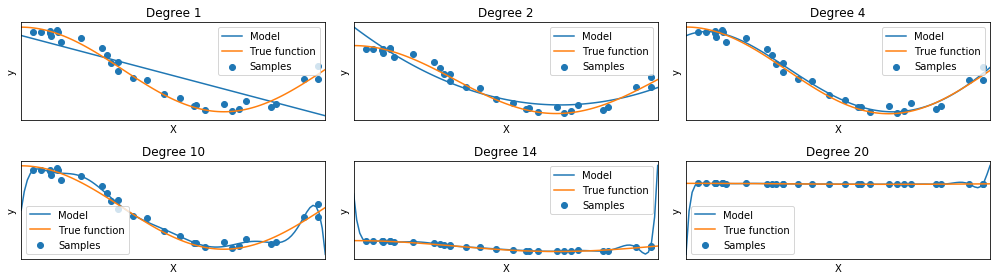

In [17]:
plt.figure(figsize = (14,4))

for i in range(len(degrees)):
    ax = plt.subplot(2, len(degrees)/2, i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    
    X_test = np.linspace(0,1,100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.xlim((0,1))
    plt.legend(loc="best")
    plt.title("Degree %d" % degrees[i])
plt.tight_layout()
plt.show()